In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('Spam.csv')

In [14]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [22]:
df['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [24]:
print(df.shape)

(4601, 58)


In [27]:
df.isna().sum()
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [29]:
X = df.drop("spam", axis = 1)
y = df.spam.values.astype(int)

In [34]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [45]:
# scaling the features
# note that the scale function standardises each column, i.e.
# x = x-mean(x)/std(x)
print(y_train.mean())
print(y_test.mean())

from sklearn.preprocessing import scale
X = scale(X)

0.3978260869565217
0.38522809558291093


In [37]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  othe

In [46]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[811,  38],
       [ 61, 471]])

In [48]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9283128167994207
precision 0.925343811394892
recall 0.8853383458646616


In [49]:
471/(471+61)

0.8853383458646616

In [54]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [58]:
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.

In [59]:
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.91770186 0.93944099 0.91925466 0.93012422 0.94254658]
mean accuracy = 0.9298136645962731


In [77]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 0.4, 0.7, 0.9,1,10]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)     

In [78]:
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vijaybmani/anaconda3/lib/python3.

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 0.7, 0.9, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [79]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.267858,0.004155,0.053506,0.000858,0.1,{'C': 0.1},0.895963,0.900621,0.906832,0.902174,...,0.905280,0.008505,6,0.912267,0.911491,0.912267,0.911491,0.906056,0.910714,0.002355
1,0.198689,0.003680,0.040074,0.001182,0.4,{'C': 0.4},0.916149,0.931677,0.919255,0.920807,...,0.923913,0.006514,5,0.937888,0.933618,0.939053,0.933230,0.933230,0.935404,0.002535
2,0.190902,0.005994,0.036244,0.001198,0.7,{'C': 0.7},0.922360,0.937888,0.920807,0.927019,...,0.929193,0.007388,4,0.947981,0.943323,0.946817,0.942935,0.941770,0.944565,0.002398
3,0.180796,0.003946,0.034295,0.000896,0.9,{'C': 0.9},0.917702,0.939441,0.920807,0.930124,...,0.930124,0.009821,2,0.951475,0.945652,0.948370,0.944876,0.942935,0.946661,0.002973
4,0.178599,0.003598,0.033240,0.000939,1,{'C': 1},0.917702,0.939441,0.919255,0.930124,...,0.929814,0.010130,3,0.951863,0.945652,0.950699,0.946040,0.943711,0.947593,0.003135
5,0.162283,0.010836,0.026917,0.001482,10,{'C': 10},0.909938,0.944099,0.933230,0.928571,...,0.931056,0.011809,1,0.973991,0.970497,0.973602,0.968944,0.970885,0.971584,0.001924


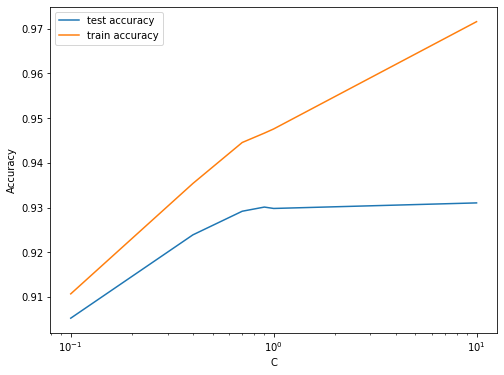

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [99]:
diabetes_train=pd.read_csv('diabetes_train.csv')
diabetes_test=pd.read_csv('diabetes_test.csv')

In [87]:
diabetes_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes,id
0,0.529042,0.012069,0.267022,1.032156,-0.665222,0.144255,-0.280841,0,336
1,-0.405123,-0.765617,-0.853328,-1.154899,0.033186,0.499992,-0.967063,0,379
2,-0.093734,0.238894,0.587122,-0.584363,-0.648393,-0.666826,0.307350,1,375
3,-0.716511,-0.636003,-3.254079,0.841977,-0.614735,1.453368,0.209318,0,8
4,-0.405123,-0.409178,0.267022,-0.013827,-0.261323,-0.097646,-0.378873,0,36


In [100]:
diabetes_test.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,id
0,-0.716511,-0.441582,-0.853328,-2.010703,0.218306,-1.093710,-0.967063,194
1,2.085984,0.076876,-0.053078,-0.299095,-0.345469,-0.282630,0.993572,12
2,-0.716511,-0.441582,-1.173428,-0.774542,-0.177178,-1.122169,-0.771000,76
3,-0.716511,-1.122057,-3.254079,1.222335,-0.480102,3.118218,-0.476904,58
4,-0.716511,-0.506389,0.106972,0.081263,-0.623149,-0.325318,-0.672968,193


In [101]:
X_train = diabetes_train.iloc[:, :7]
y_train = diabetes_train.iloc[:, 7]
X_test = diabetes_train.iloc[:, :7]

In [90]:
X_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
0,0.529042,0.012069,0.267022,1.032156,-0.665222,0.144255,-0.280841
1,-0.405123,-0.765617,-0.853328,-1.154899,0.033186,0.499992,-0.967063
2,-0.093734,0.238894,0.587122,-0.584363,-0.648393,-0.666826,0.307350
3,-0.716511,-0.636003,-3.254079,0.841977,-0.614735,1.453368,0.209318
4,-0.405123,-0.409178,0.267022,-0.013827,-0.261323,-0.097646,-0.378873


In [93]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [102]:
# fit
model.fit(X_train, y_train)

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
y_train_pred = model.predict(X_train)

In [107]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[195,  15],
       [ 38,  66]])

In [109]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_train, y_train_pred))

# precision
print("precision", metrics.precision_score(y_train, y_train_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_train, y_train_pred))



accuracy 0.8312101910828026
precision 0.8148148148148148
recall 0.6346153846153846


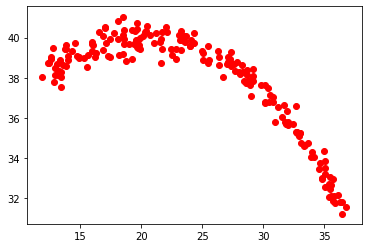

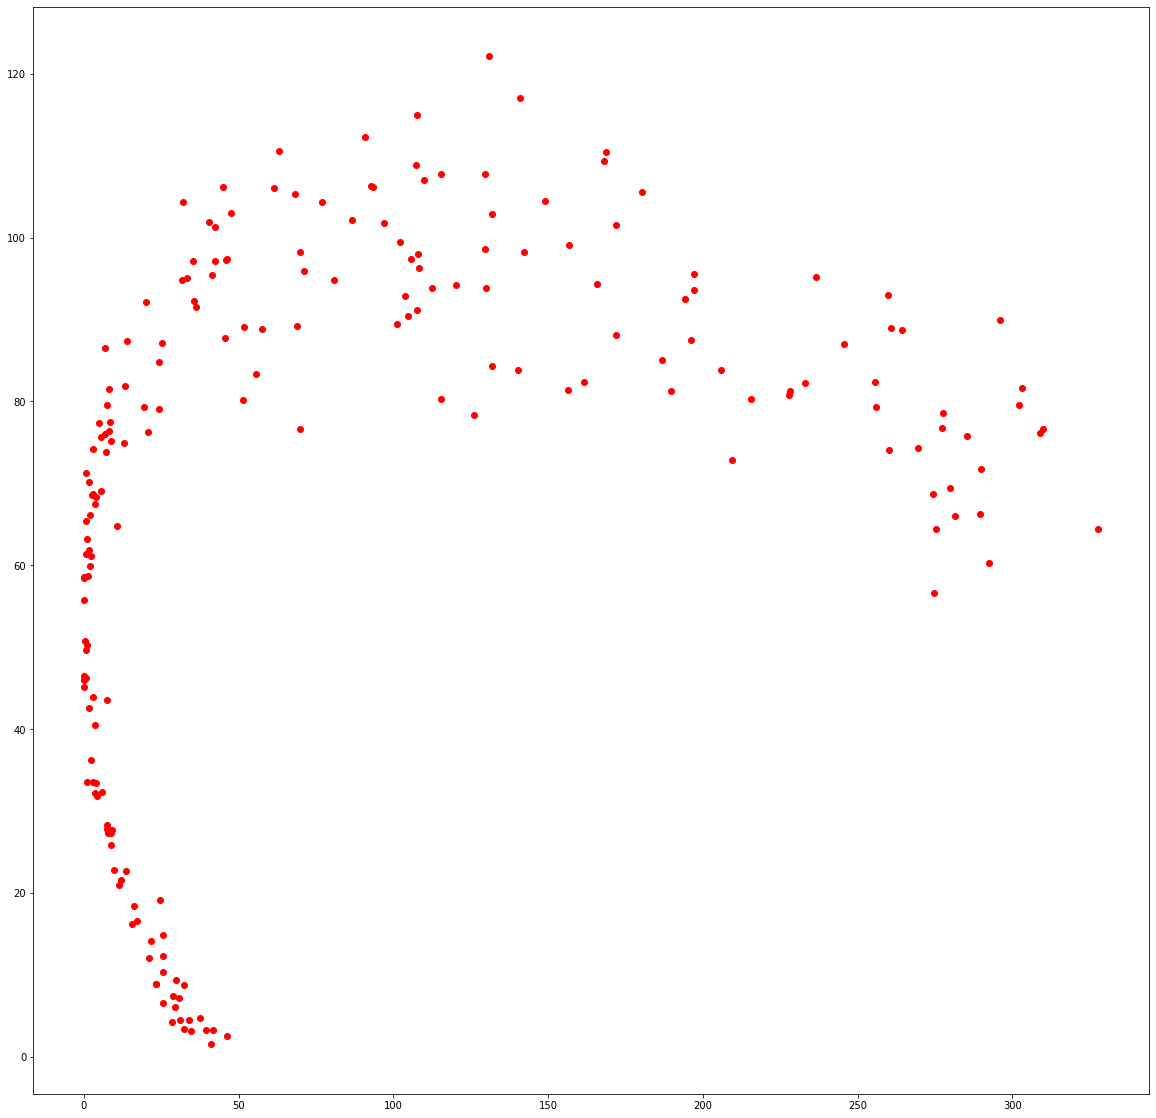

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=np.random.uniform(low=10, high=35, size=(200,)) + np.random.normal(loc=2, scale=0.5, size=200)
y = np.sqrt(400 - (x-20)**2)+ np.random.normal(loc=20, scale=0.5, size=200)
plt.scatter(x,y,color=['red'])
plt.figure(figsize=(20,20))
p = (x-30)**2
q = (y-30)**2
plt.scatter(p,q,color=['red'])

In [116]:
0.09	0.16
loved	0.30	0.06
the	0.06	0.05
food	0.04	0.35
and	0.08	0.07
cleanliness	0.40	0.03

0.4

In [119]:
0.09*0.30*0.06*0.04*0.08*0.40*0.1

2.0736000000000005e-07

In [120]:
0.16*0.06*0.06*0.35*0.07*0.03*0.9

3.81024e-07